<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytical CRM**
Analytical CRM enables companies to analyze customer data to better understand behavior, predict needs, and personalize interactions, with data mining and customer segmentation playing key roles in driving effective marketing strategies. Its architecture typically includes data warehouses and data marts supported by analytics tools like OLAP, integrated CRM systems, and data visualization technologies that help interpret complex insights. While challenges such as data quality and customer privacy must be carefully managed, Analytical CRM offers significant benefits by improving decision-making, enhancing customer experiences, optimizing marketing efforts, increasing retention, and ultimately supporting business growth.

In [35]:
pip install squarify

In [36]:
# Importing all the necessary libraries:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

pd.set_option('display.max_columns', None)

## **Example: Customer Segmentation**
Let's imagine you are a marketing manager who is looking to increase lead conversion into customers and boost company revenue. You have a CRM database with information about leads, such as name, email, phone number, lead generation source, interactions with the company, and marketing campaign history.

In [43]:
# Downloading the dataset:
!gdown 13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC

# Importing and displaying the dataset:
df = pd.read_csv('Customer Segmentation.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC
To: /content/Customer Segmentation.csv
100% 13.5M/13.5M [00:00<00:00, 117MB/s] 


,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,phone,street_address,street_name,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,222-398-8279,93 Fremont Drive,Green,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,650-786-5808,0841 Troy Park,Gerald,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,325-412-0143,09450 Rowland Center,Eggendart,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,664-380-9221,5173 Nelson Alley,Annamark,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,477-429-2626,833 Vermont Drive,Clarendon,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


<Axes: >

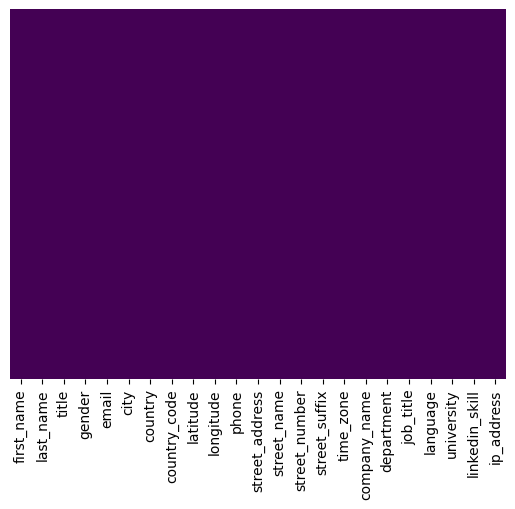

In [44]:
# Plotting heatmap:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [45]:
df.nunique()

,0
first_name,8416
last_name,31257
title,6
gender,8
email,51000
city,24921
country,235
country_code,234
latitude,26324
longitude,25821


Text(0, 0.5, 'Department')

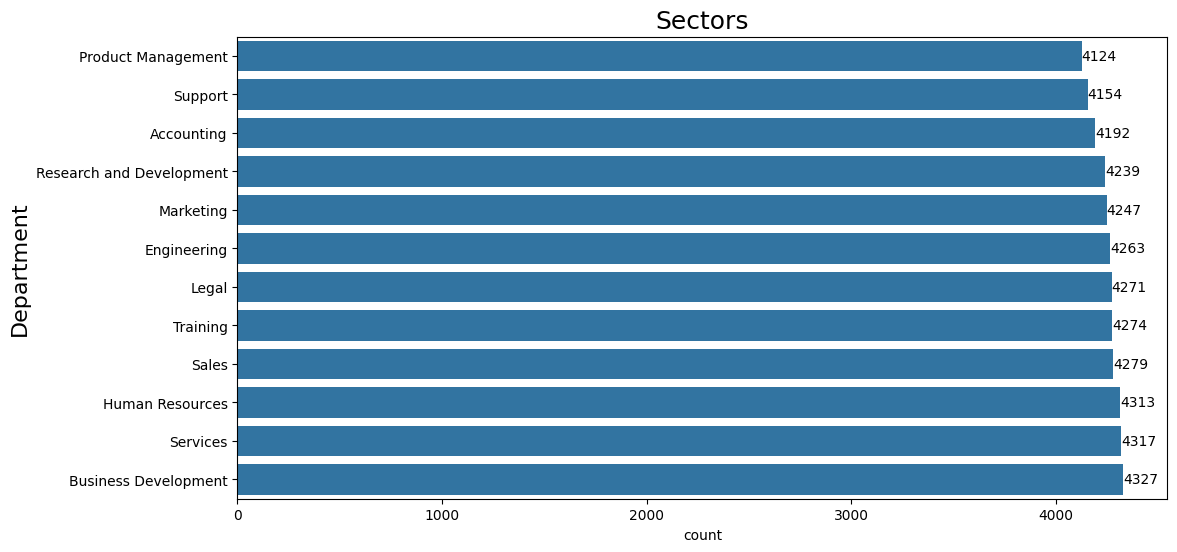

In [52]:
# Plotting bar chart with departments:
plt.figure(figsize=(12, 6))
department = df['department']
ax=sns.countplot(y= department ,data =df,orient='h',order=department.value_counts().sort_values().index)
plt.title('Sectors', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Department', fontsize=16)

Text(0, 0.5, 'Gender')

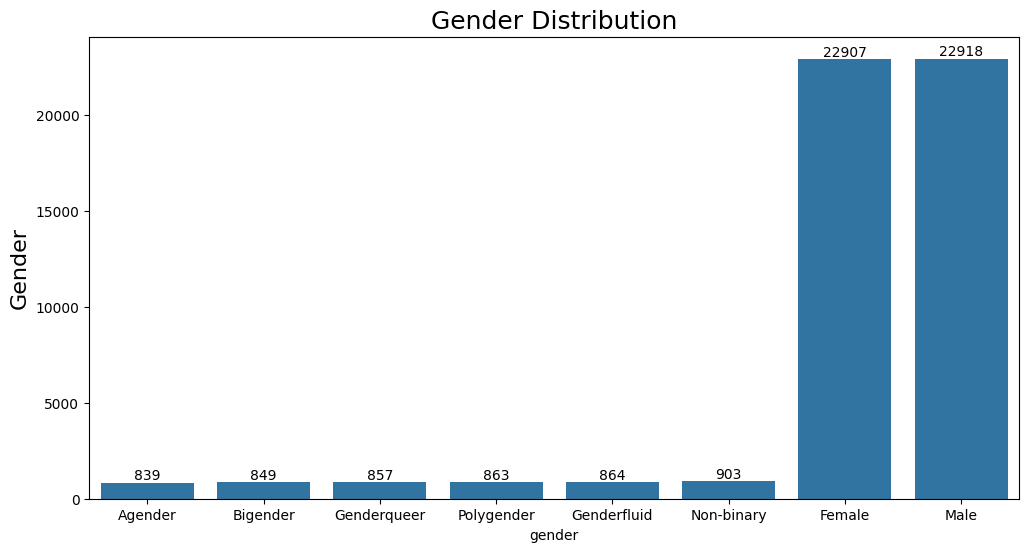

In [54]:
# Plotting bar chart with gender distribution:
plt.figure(figsize=(12, 6))
sex = df['gender']
ax=sns.countplot(x= sex ,data =df,orient='v',order=sex.value_counts().sort_values().index)
plt.title('Gender Distribution', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Text(0, 0.5, 'Region')

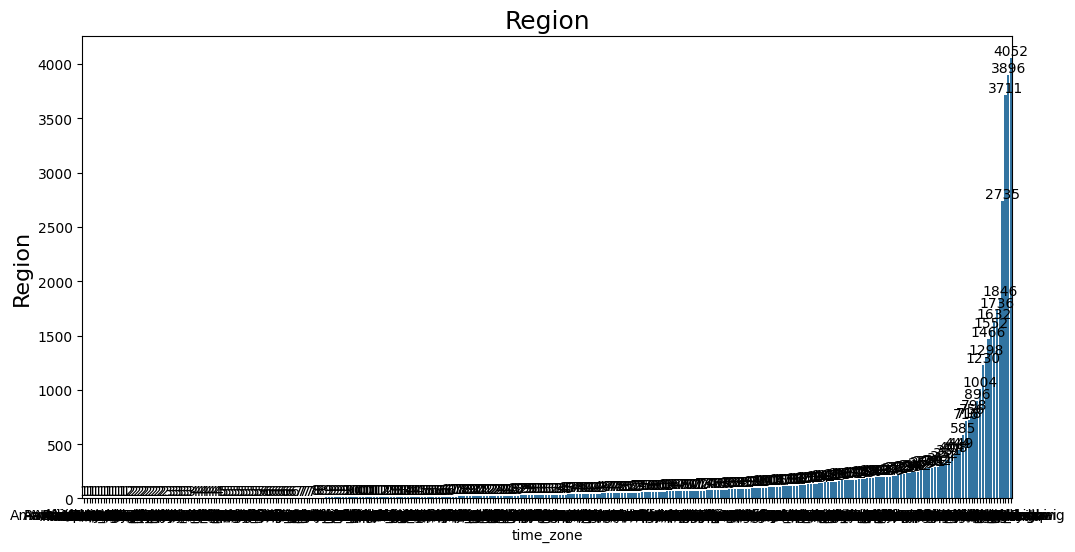

In [57]:
# Plotting a bar chart with region:
plt.figure(figsize=(12, 6))
continent = df['time_zone']
ax=sns.countplot(x= continent ,data =df,orient='v',order=continent.value_counts().sort_values().index)
plt.title('Region', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Region', fontsize=16)

In [ ]:
# Splitting string on every '/':
df['time_zone'] = df['time_zone'].str.split('/').str[0]

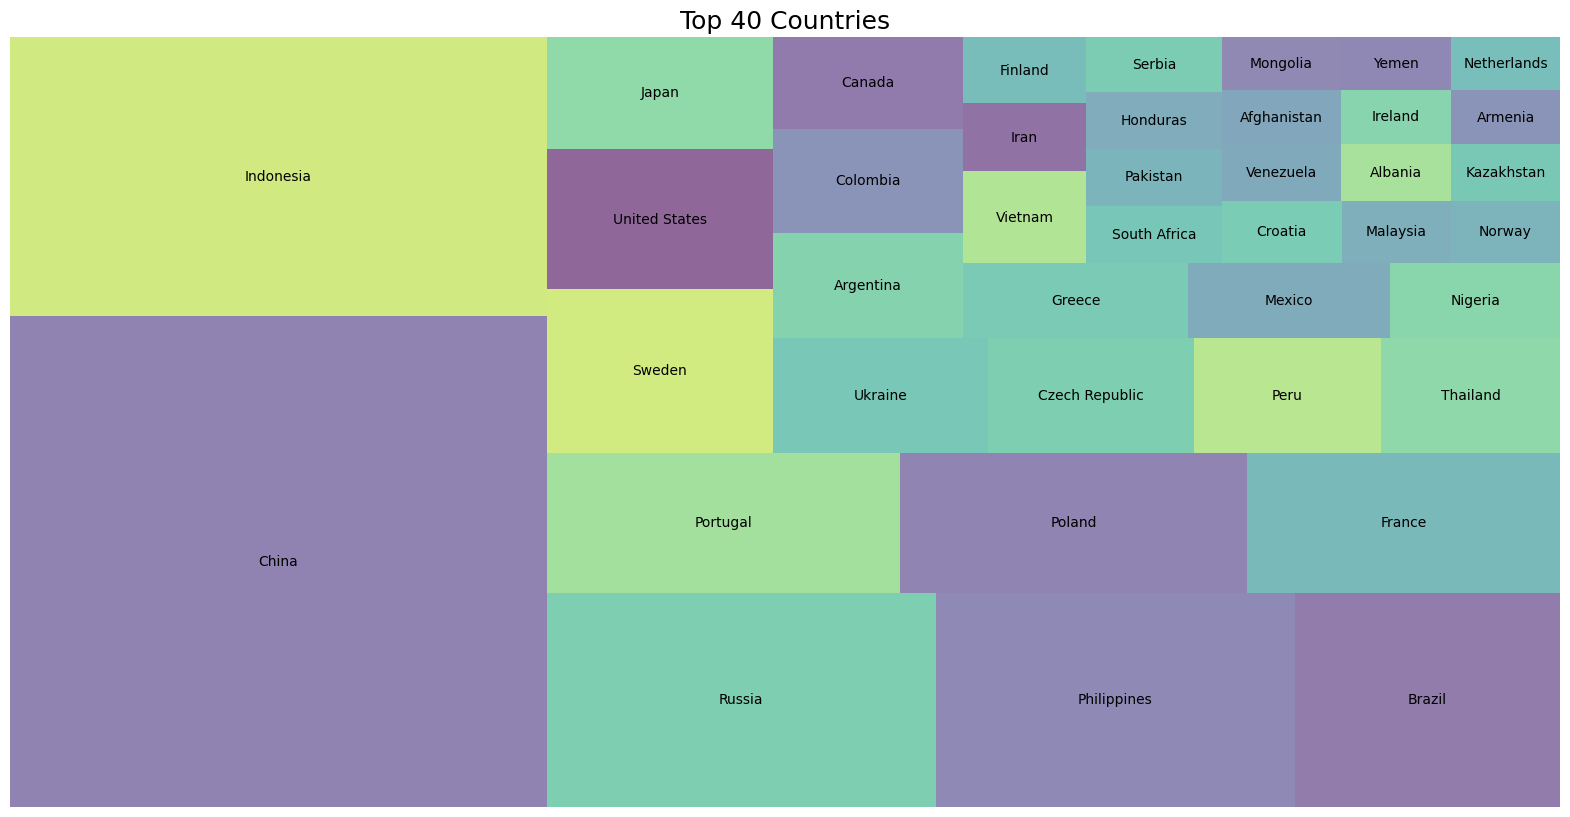

In [58]:
# Plotting a Treemap with top 40 countries:
plt.figure(figsize=(20, 10))
sizes = df['country'].value_counts()[:40]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 40 Countries', fontsize=18)
plt.axis('off')
plt.show()

In [59]:
# Filtering the dataset with instances related to Brazil:
brazil = df[df['country'] == 'Brazil']
brazil

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,phone,street_address,street_name,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
5,Cleveland,Lindegard,Mr,Female,clindegard5@ezinearticles.com,Tarauacá,Brazil,BR,-8.213232,-71.382437,179-490-8666,2 Tomscot Court,Oak,6390,Center,America/Rio_Branco,Shuffletag,Sales,Mechanical Systems Engineer,Portuguese,Universidade Vale do Rio Doce,Occupational Therapists,221.193.207.249
31,Margret,Thridgould,Ms,Female,mthridgouldv@ucla.edu,Cordeirópolis,Brazil,BR,-22.493938,-47.429433,513-939-8601,29 Milwaukee Center,3rd,3532,Terrace,America/Sao_Paulo,Vipe,Training,Environmental Tech,Nepali,Universidade Santa Cecília dos Bandeirantes,NCP,12.51.107.204
33,Molli,Sherwen,Rev,Male,msherwenx@nymag.com,Araçuaí,Brazil,BR,-16.848817,-42.063300,629-238-5782,95 Waxwing Lane,Burning Wood,92868,Point,America/Sao_Paulo,Skinder,Product Management,Chief Design Engineer,Tok Pisin,Universidade do Rio de Janeiro,OEM negotiations,1.237.183.159
40,Devin,Wethers,Mrs,Genderfluid,dwethers14@youku.com,Parintins,Brazil,BR,-2.624236,-56.734617,430-307-2420,1 Laurel Lane,Waubesa,20782,Terrace,America/Manaus,Gabtype,Product Management,Analyst Programmer,Bengali,Universidade Católica Dom Bosco,High Rise,230.18.222.23
58,Nobie,Bearman,Rev,Male,nbearman1m@forbes.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,859-109-1085,48 Hansons Road,Banding,670,Junction,America/Sao_Paulo,Skinder,Product Management,Biostatistician III,Guaraní,Universidade do Grande Rio,CFTC,92.0.50.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50806,Morrie,Ovendon,Dr,Female,movendonme@booking.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,988-472-0749,59711 Walton Way,Larry,937,Drive,America/Sao_Paulo,Edgewire,Business Development,Automation Specialist III,Kazakh,Centro Universitário Newton Paiva,Atomic Absorption,253.154.245.68
50841,Raphaela,Shadfourth,Dr,Male,rshadfourthnd@yandex.ru,Amaraji,Brazil,BR,-8.374877,-35.455134,327-677-6953,43 Mesta Circle,Mockingbird,578,Street,America/Recife,Thoughtstorm,Legal,Accountant II,Quechua,Universidade Federal da Bahia,RVs,15.107.108.130
50846,Gilberta,Gashion,Ms,Female,ggashionni@soup.io,Oliveira,Brazil,BR,-20.698430,-44.825678,694-373-0464,67 Warrior Point,Brentwood,8351,Place,America/Sao_Paulo,Tagopia,Marketing,Business Systems Development Analyst,Montenegrin,Faculdades Integradas Curitiba,IBM Websphere Commerce,103.211.129.63
50908,Rem,Bourley,Ms,Female,rbourleyp8@flavors.me,Arapiraca,Brazil,BR,-9.755588,-36.663958,594-821-9095,68 Stuart Avenue,Stuart,66631,Pass,America/Maceio,Eare,Business Development,Cost Accountant,Burmese,Universidade Estadual de Feira de Santana,Market Planning,152.191.73.52


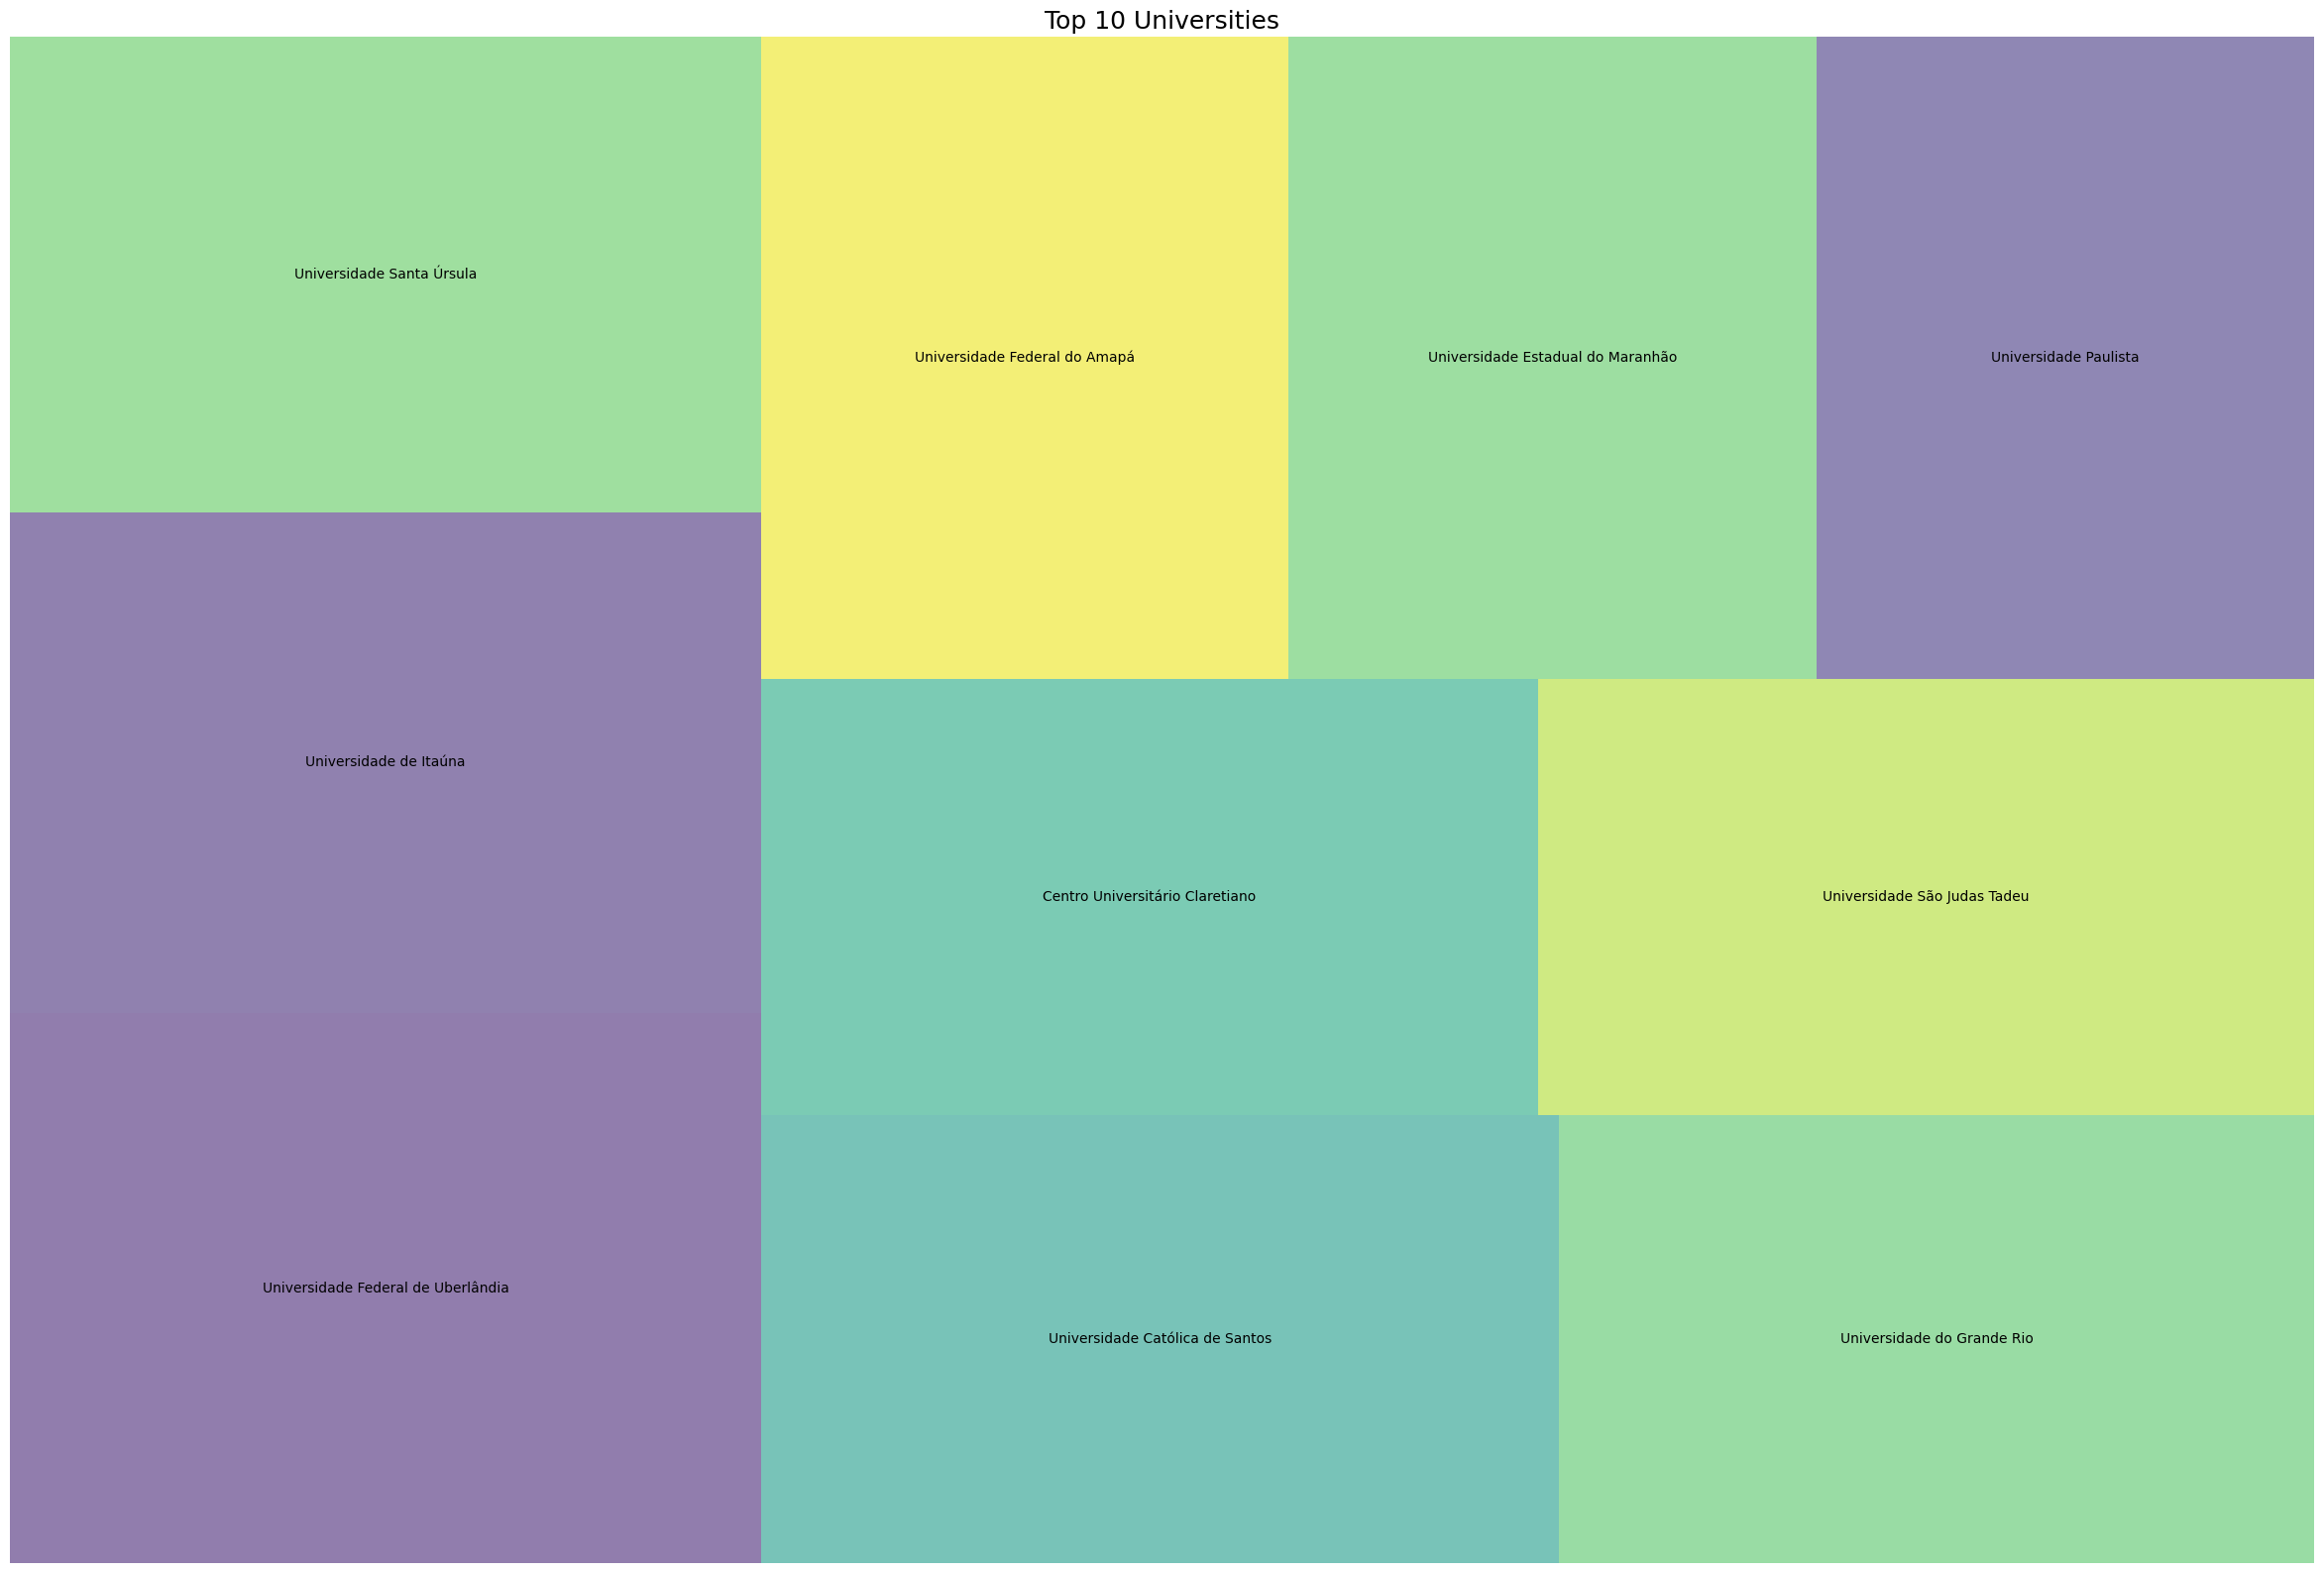

In [60]:
# Plotting a Treemap with top 40 universities:
plt.figure(figsize=(30, 20))
sizes = brazil['university'].value_counts()[:10]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 10 Universities', fontsize=18)
plt.axis('off')
plt.show()